# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = f"https://api.openweathermap.org/data/2.5/weather?lat={32.08}&lon={-81.09}&appid={weather_api_key}&units=imperial"
city_weather = requests.get(url).json()
city_weather

{'coord': {'lon': -81.09, 'lat': 32.08},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 68.5,
  'feels_like': 67.87,
  'temp_min': 64.9,
  'temp_max': 73.42,
  'pressure': 1015,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 130},
 'clouds': {'all': 0},
 'dt': 1665013941,
 'sys': {'type': 1,
  'id': 5948,
  'country': 'US',
  'sunrise': 1664968846,
  'sunset': 1665011071},
 'timezone': -14400,
 'id': 4221552,
 'name': 'Savannah',
 'cod': 200}

In [17]:
lat= city_weather["coord"]["lat"]
lng= city_weather["coord"]["lon"]
max_temp= city_weather["main"]["temp_max"]
humidity= city_weather["main"]["humidity"]
clouds= city_weather["clouds"]["all"]
wind= city_weather["wind"]["speed"]
country= city_weather["sys"]["country"]
date= city_weather["dt"]


1665013941

In [18]:
url = f"https://api.openweathermap.org/data/2.5/weather?lat={32.08}&lon={-81.09}&appid={weather_api_key}&units=imperial"
weather_data=[]

print("Beginning Retrieval")
print("-------------------")

record = 1
set = 1

for i, city in enumerate(cities):
     if (i % 50 == 0 and i >= 50):
         set +=1
         record = 1
         time.sleep(60)
        
     cityurl = url+"&q="+city
     print ("Processing Record %s of Set %s | %s" % (record, set, city))
     record += 1
    
    
     try: 
        

         city_weather = requests.get(cityurl).json()
        
         lat= city_weather["coord"]["lat"]
         lng= city_weather["coord"]["lon"]
         max_temp= city_weather["main"]["temp_max"]
         humidity= city_weather["main"]["humidity"]
         clouds= city_weather["clouds"]["all"]
         wind= city_weather["wind"]["speed"]
         country= city_weather["sys"]["country"]
         date= city_weather["dt"]
        
         weather_data.append({"City": city,
                             "Lat": lat,
                             "Long": lng,
                             "Max Temp": max_temp,
                             "Humidity": humidity,
                             "Cloudiness": clouds,
                             "Wind Speed": wind,
                             "Country": country,
                             "Date": date})
        
     except: 
         print("not found skipping.")
         pass
    
 print("data retrieval complete")      



Beginning Retrieval
-------------------
Processing Record 1 of Set 1 | port hawkesbury
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | hambantota
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | nabire
Processing Record 8 of Set 1 | barentsburg
not found skipping.
Processing Record 9 of Set 1 | grand river south east
not found skipping.
Processing Record 10 of Set 1 | sancti spiritus
Processing Record 11 of Set 1 | gra liyia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | saint-georges
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | redlands
Processin

Processing Record 37 of Set 4 | havelock
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | miles city
Processing Record 42 of Set 4 | tucuman
Processing Record 43 of Set 4 | kijang
Processing Record 44 of Set 4 | pampilhosa
Processing Record 45 of Set 4 | nagyigmand
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | snezhnogorsk
Processing Record 49 of Set 4 | orel
Processing Record 50 of Set 4 | vrangel
Processing Record 1 of Set 5 | buraydah
Processing Record 2 of Set 5 | mabaruma
Processing Record 3 of Set 5 | lufilufi
Processing Record 4 of Set 5 | halalo
not found skipping.
Processing Record 5 of Set 5 | umzimvubu
not found skipping.
Processing Record 6 of Set 5 | cartagena
Processing Record 7 of Set 5 | kutum
Processing Record 8 of Set 5 | huinan
Processing Record 9 of Set 5 | bridgewater
Processing Record 10 of

Processing Record 30 of Set 8 | carnduff
Processing Record 31 of Set 8 | emerald
Processing Record 32 of Set 8 | leirvik
Processing Record 33 of Set 8 | livingston
Processing Record 34 of Set 8 | arlit
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | imbituba
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | mantua
Processing Record 39 of Set 8 | norman wells
Processing Record 40 of Set 8 | olafsvik
Processing Record 41 of Set 8 | lehututu
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | brzeg
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | gombe
Processing Record 46 of Set 8 | roald
Processing Record 47 of Set 8 | kahta
Processing Record 48 of Set 8 | hinton
Processing Record 49 of Set 8 | piriyapatna
Processing Record 50 of Set 8 | rungata
not found skipping.
Processing Record 1 of Set 9 | huarmey
Processing Record 2 of Set 9 | los llanos de aridane
Processing Record 3 of Set 9 | raude

Processing Record 22 of Set 12 | sovetskiy
Processing Record 23 of Set 12 | ardmore
Processing Record 24 of Set 12 | yenisehir
Processing Record 25 of Set 12 | conakry
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | prado
Processing Record 28 of Set 12 | homer
Processing Record 29 of Set 12 | sur
Processing Record 30 of Set 12 | kindu
Processing Record 31 of Set 12 | mahibadhoo
Processing Record 32 of Set 12 | derzhavinsk
Processing Record 33 of Set 12 | leiyang
Processing Record 34 of Set 12 | koslan
Processing Record 35 of Set 12 | las vegas
Processing Record 36 of Set 12 | sao joao da barra
Processing Record 37 of Set 12 | rognan
Processing Record 38 of Set 12 | mogochin
not found skipping.
Processing Record 39 of Set 12 | namatanai
Processing Record 40 of Set 12 | boa vista
Processing Record 41 of Set 12 | san cristobal
Processing Record 42 of Set 12 | isangel
Processing Record 43 of Set 12 | dzemul
Processing Record 44 of Set 12 | francia
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
cityDF = pd.DataFrame(weather_data)
cityDF



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hawkesbury,45.6169,-61.3485,56.59,94,100,6.91,CA,1665015594
1,east london,-33.0153,27.9116,64.67,83,100,7.34,ZA,1665015410
2,hambantota,6.1241,81.1185,78.15,82,100,16.69,LK,1665015594
3,punta arenas,-53.1500,-70.9167,44.71,76,75,13.80,CL,1665015595
4,hilo,19.7297,-155.0900,83.25,79,100,5.99,US,1665015596
...,...,...,...,...,...,...,...,...,...
566,marabba,12.3500,32.1833,75.60,72,91,9.10,SD,1665016626
567,fougamou,-1.2154,10.5838,73.18,98,100,2.37,GA,1665016627
568,nyagan,62.1406,65.3936,41.09,94,96,4.34,RU,1665016329
569,hokitika,-42.7167,170.9667,46.74,36,0,8.99,NZ,1665016628


In [20]:
cityDF.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.670889,17.234092,61.453783,72.910683,58.619965,8.640053,1.665016e+09
std,33.192448,90.838507,17.989507,20.904983,39.195115,6.116805,3.113369e+02
min,-54.800000,-175.200000,1.580000,7.000000,0.000000,0.000000,1.665015e+09
25%,-6.169300,-61.010900,48.180000,62.500000,20.000000,4.050000,1.665016e+09
50%,27.117200,20.756400,63.990000,78.000000,74.000000,7.380000,1.665016e+09
75%,49.941700,97.584250,76.920000,89.000000,99.000000,11.500000,1.665016e+09
max,78.218600,179.316700,95.650000,100.000000,100.000000,39.350000,1.665017e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
clean_city_data = cityDF

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [24]:
lats = clean_city_data.Lat
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data.Humidity
cloudiness = clean_city_data.Cloudiness
speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

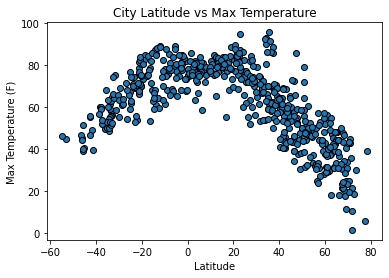

In [28]:
plt.scatter(lats, max_temp, edgecolor = "black")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../output_data/MaxT.png")
plt.show()

## Latitude vs. Humidity Plot

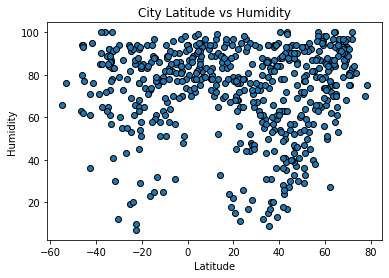

In [29]:
plt.scatter(lats, humidity, edgecolor = "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("../output_data/Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

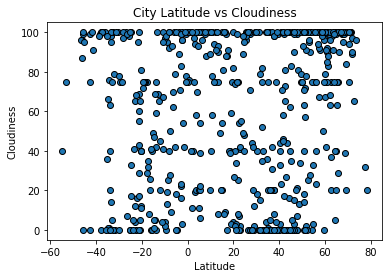

In [30]:
plt.scatter(lats, cloudiness, edgecolor = "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../output_data/Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

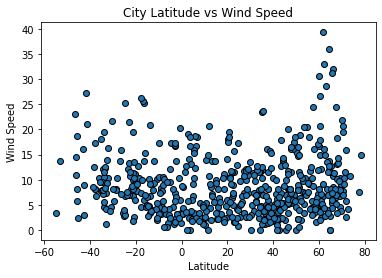

In [31]:
plt.scatter(lats, speed, edgecolor = "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("../output_data/Wind_Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


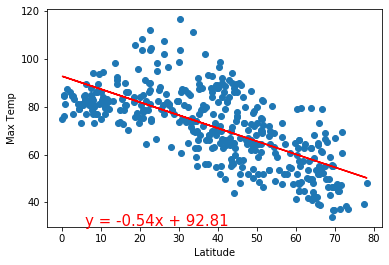

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


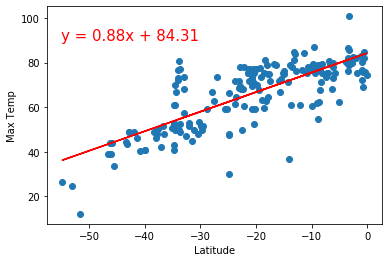

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


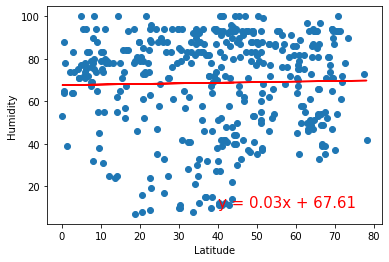

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


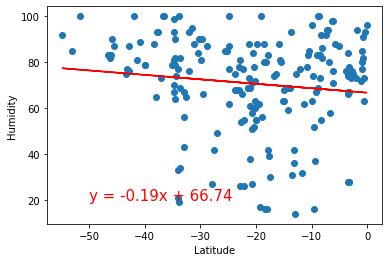

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


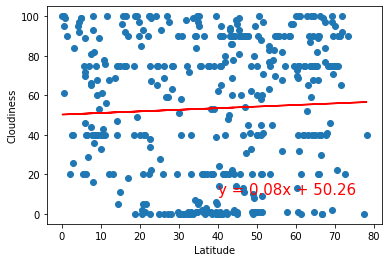

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


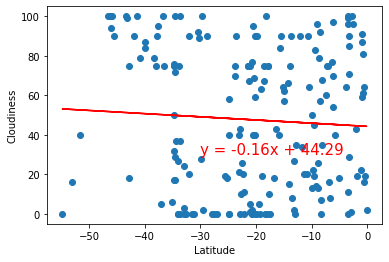

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


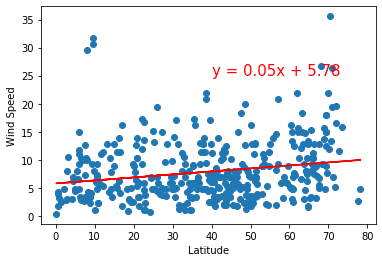

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


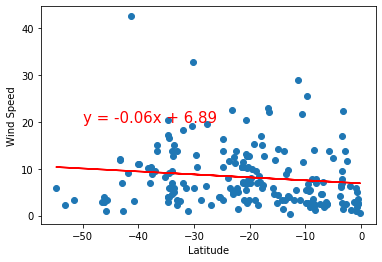